In [1]:
%matplotlib inline
import numpy as np
from glob import glob
from skimage import io
from matplotlib import pyplot as plt
from helperfuncs import image_slice,imm, slicing_for_assembley
import os.path
import os

In [2]:
directory = open('path_to_datafolder.txt','r').readlines()[0].strip('\n')

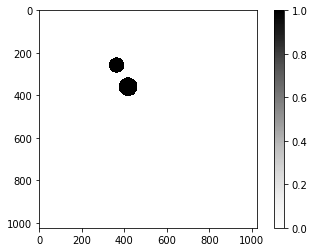

In [12]:
# label_file_list = glob(directory+'/labels/*.png')
test_label = io.imread(label_file_list[0], as_grey=True)
plt.imshow(test_label, cmap='Greys')
plt.colorbar()
# plt.Figure()


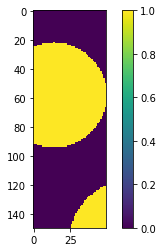

In [21]:
plt.imshow(test_label[200:350,350:400])
plt.colorbar()

(1024, 1024, 4)


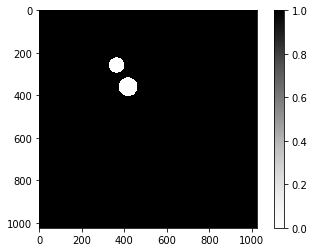

In [24]:
plt_test_label = plt.imread(label_file_list[0])
print(plt_test_label.shape)
plt.imshow(plt_test_label, cmap='Greys')
plt.colorbar()

In [25]:
image_file_list = glob(directory+'/images/*.png')

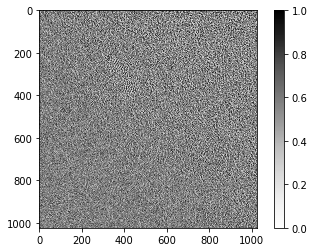

In [26]:
test_image = io.imread(image_file_list[0],as_grey=True)
plt.imshow(test_image,cmap='Greys')
plt.colorbar()

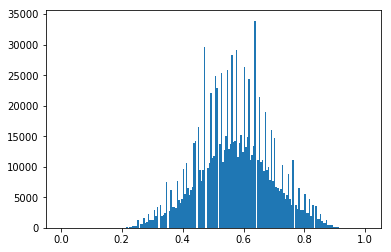

In [28]:
_ = plt.hist(test_image.flatten(),bins = 200)

In [30]:
np.any(np.isin([1],test_label[200:350,350:400]))

True

In [31]:
np.any(np.isin([1],test_label[800:1000,800:1000]))

False

In [34]:
def image_slice_small(directory):
    """used to break up the 1024x1024 images into 64x64 segments takes a
     diretory that is the source"""
    image_file_list = glob(directory+'/images/*.png')
    image_new_directory = directory + '/small_sliced_images/'
    if os.path.isdir(image_new_directory) != True:
        os.mkdir(image_new_directory)
    label_file_list = glob(directory+'/labels/*.png')
    label_new_directory = directory + '/small_sliced_labels/'
    if os.path.isdir(label_new_directory) != True:
        os.mkdir(label_new_directory)
    image_name_list = [name.split('/')[-1].split('.')[0] for name in image_file_list]
    label_name_list = [name.split('/')[-1].split('.')[0] for name in label_file_list]
    if len(image_name_list) != len(label_name_list):
        raise RuntimeError('different number of images and labels')
    if image_name_list != label_name_list:
        raise RuntimeError('images and labels did not match')
    for idx, file in enumerate(image_file_list):
        image2split = io.imread(file, as_grey=True)
        label2split = io.imread(label_file_list[idx], as_grey=True)
        for x in range(0,15*64,64):
            for y in range(0,15*64,64):
                image = image2split[x:x+64,y:y+64]
                label = label2split[x:x+64,y:y+64]
                if np.any(np.isin([1],label)) == False:
                    pass
                else:
                    image_name = image_name_list[idx]+ '_' + str(x)+ str(y) + '.png'
                    label_name = image_name_list[idx]+ '_' + str(x)+ str(y) + '.png'
                    plt.imsave(image_new_directory+image_name,image, cmap='gray')
                    plt.imsave(label_new_directory+label_name,label, cmap='gray')
    print('done!')

In [35]:
image_slice_small(directory)

done!


In [2]:
directory2 = '/Users/cgroschner/Documents/pythonDev/particleRecognition/classfier_builds/data_subset'

In [3]:
slicing_for_assembley(directory2)

done!
